In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime as dt

In [20]:
preped_data = pd.read_csv('preped_data.csv')

In [21]:
preped_data.info()
display(preped_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1000000 non-null  int64  
 1   state          1000000 non-null  object 
 2   dt             1000000 non-null  object 
 3   temp_C         1000000 non-null  float64
 4   humid_pct      1000000 non-null  float64
 5   precip_mm      1000000 non-null  float64
 6   windspeed_kmh  1000000 non-null  float64
 7   temp_F         1000000 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


,Unnamed: 0,state,dt,temp_C,humid_pct,precip_mm,windspeed_kmh,temp_F
0,0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540,51.229402
1,1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161,47.721452
2,2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951,52.938385
3,3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303,16.467843
4,4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622,103.654783


In [22]:
preped_data = preped_data.drop(['Unnamed: 0'], axis = 1)

#changing into more suitable data types and fixing datetime if needed
#change data types by using a dictionary

preped_data = preped_data.astype({'state': 'category'})
preped_data['dt'] = pd.to_datetime(preped_data['dt'])

In [25]:
def plots(plot_type, args):
    
    match plot_type:
        
        case 'pie':
            if len(args) > 1:
                return 'Pie charts only need one variable'
            else:
                plt.pie(preped_data[args[0]])

ValueError: could not convert string to float: 'San Diego'

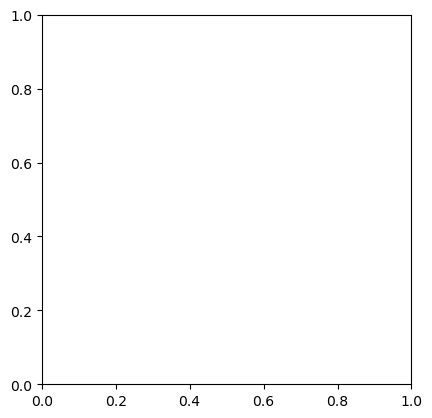

In [26]:
plots('pie', ['state'])